# HCC case

In [1]:
from platform import python_version
print(python_version())

3.8.10


In [2]:
import numpy as np
import pandas as pd
import feyn

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from functions import modsum, model_features_chart, crossvalidation_as_framework


In [3]:
feyn.__version__

'2.1.2'

In [4]:
# Load the data
data = pd.read_csv("../data/cancer_hcc.csv")

In [5]:
data.shape

(91, 1713)

In [6]:
# Define the semantic types
stypes = {}
for f in data.columns:
    if data[f].dtype =='object':
        stypes[f] = 'c'
        
# Set random seed for reproducibility
random_seed = 42

# Define the target variable
target = "target"

In [7]:
### get the test data
random_seed = 42
train_val, test = train_test_split(data, test_size=0.2, stratify=data[target], random_state=random_seed)

## Set multifigure filename

In [8]:
filename = '../figures/'

## In depth modelling 

In [9]:
projectname = 'hcc_mctaseq_epigenomics_'

In [10]:
pathname = '../figures/'

In [11]:
### Get the test data
random_seed = 42
train_val, test = train_test_split(data, test_size=0.2, stratify=data[target], random_state=random_seed)

In [12]:
epochs = 50
criterion = 'bic'
max_complexity = 5
random_seed = 15
sw = np.where(train_val[target] == 1, np.sum(train_val[target] == 0)/sum(train_val[target]), 1)

In [13]:
ql = feyn.connect_qlattice(server="https://qlattice.stage.abzu.ai") # Connecting
ql.reset(random_seed) # Resetting
models_single = ql.auto_run(data = train_val,
                         output_name = target,
                         kind = "classification",
                         stypes = stypes,
                         n_epochs = epochs,
                         criterion=criterion,
                         max_complexity = max_complexity,
                         sample_weights=sw)

In [14]:
def simple_str(m):
    return "logreg(" +  ''.join(list(map(lambda x:x[0:8], str(m)[7:-1].replace("*"," * ").split())))+")"

df_summary = modsum(models_single, train_val, test)[['N. Features', 'Functional form', 'BIC', 'Loss', 'AUC Train']]
df_summary['Functional form'] = df_summary['Functional form'].apply(simple_str)
df_summary.to_csv(filename+projectname+"summary.csv")
df_summary

,N. Features,Functional form,BIC,Loss,AUC Train
0,3,logreg(chr16676+chr17594+chr68783),11.67,0.021642,1.0
1,3,logreg(chr10131*chr17594+chrX3754),13.56,0.005101,1.0
2,3,logreg(chr16896+chr17594+chr61585),13.62,0.035156,1.0
3,3,logreg(chr10131*chr17594+chr11069),14.19,0.009462,1.0
4,3,logreg(chr11177+chr17594+chr51881),14.68,0.042525,1.0
5,2,logreg(chr17594+chr39987),14.72,0.072524,1.0
6,3,logreg(chr10131+chr17594+chr72324),14.75,0.043011,1.0
7,2,logreg(chr17594+chr68783),17.81,0.094013,0.99
8,3,logreg(chr17594+chr31195+chr39987),19.82,0.078207,1.0
9,3,logreg(chr17594+chr19495+chr61585),19.88,0.078681,1.0


<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="216.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 621 216.0" width="621" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="155.0" width="351" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="241" y="50.0"><title>target
logistic:
w=11.1148
bias=-0.5617</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">target</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="243" y="59.0">out</text><line stroke="#1E1E1E" x1="211" x2="241" y1="67.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="50.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="71.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="59.0">1</text><line stroke="#1E1E1E" x1="91" x2="121" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="76.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="20.0"><title>chr17_59473060_59483266
linear:
scale=0.001503
scale offset=160.083333
w=6.621311
bias=0.3485</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="41.5">chr17_59..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="29.0">2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="29.0">num</text><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="80.0"><title>chr3_9987895_9989619
linear:
scale=0.008097
scale offset=117.944444
w=-1.458994
bias=0.2634</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="101.5">chr3_998..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="89.0">3</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="89.0">num</text></svg><svg class="summary" height="79" width="180" x="351" y="0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="0" y="14">Training Metrics</text><line stroke="#1E1E1E" x1="0" x2="160" y1="19" y2="19" /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="34">Accuracy</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="34">0.972</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="49">AUC</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="49">0.998</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="64">Precision</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="64">0.964</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="79">Recall</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="79">0.964</text></svg><svg class="summary" height="79" width="90" x="531" y="0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="14" tex
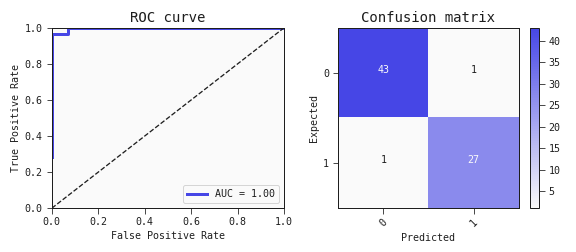
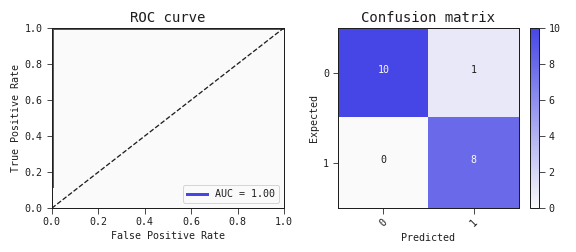

In [15]:
models_single[5].plot(train_val,test)

In [16]:
feature_plot_hcc_mctaseq = model_features_chart(test, models_single, metric="roc_auc_score")
model_features_chart(test, models_single, metric="roc_auc_score")

,roc_auc_score,chr17_59473060_59483266,chr10_131761169_131771696,chr3_9987895_9989619,chr6_158507719_158508126,chr6_87832219_87832610,chr5_1881924_1887743,chr16_67686860_67687674,chr1_10698299_10698910,chr3_119528920_119529159,chrX_37544804_37545419,chr19_49575129_49576076,chr7_23245556_23246161,chr11_17756056_17758286,chr16_89641053_89643415
Model#,,,,,,,,,,,,,,,
0,1.000000,True,False,False,False,True,False,True,False,False,False,False,False,False,False
1,1.000000,True,True,False,False,False,False,False,False,False,True,False,False,False,False
2,0.965909,True,False,False,True,False,False,False,False,False,False,False,False,False,True
3,0.988636,True,True,False,False,False,False,False,True,False,False,False,False,False,False
4,0.909091,True,False,False,False,False,True,False,False,False,False,False,False,True,False
5,1.000000,True,False,True,False,False,False,False,False,False,False,False,False,False,False
6,0.988636,True,True,False,False,False,False,False,False,False,False,False,True,False,False
7,0.943182,True,False,False,False,True,False,False,False,False,False,False,False,False,False
8,1.000000,True,False,True,False,False,False,False,False,True,False,False,False,False,False


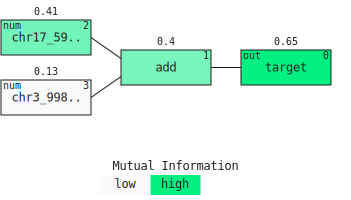

In [17]:
models_single[5].plot_signal(train_val, corr_func='mutual_information', 
                             filename=pathname+projectname+'plot_signal_mi.pdf')

In [27]:
sympy_model = models_single[5].sympify(symbolic_lr = True, signif=3)
sympy_model.as_expr()

1/(0.0179*exp(-0.111*chr175947306059483266 + 0.131*chr399878959989619) + 1)

In [28]:
features_data = train_val[models_single[5].features + ["target"]]

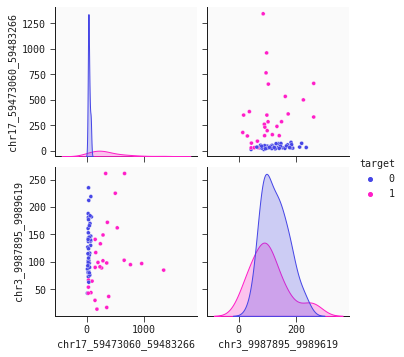

In [92]:
import seaborn as sns
# Pairplot with target coloring
sns.pairplot(features_data, hue = 'target')
plt.savefig(pathname+projectname+'pairplot.svg')

In [30]:
features_data.columns

Index(['chr17_59473060_59483266', 'chr3_9987895_9989619', 'target'], dtype='object')

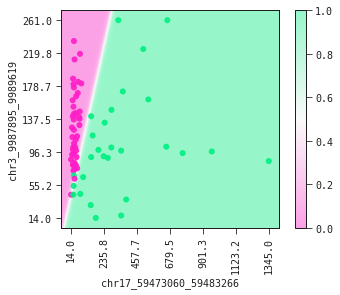

In [105]:
# Plot a 2-dimensional partial plot
models_single[5].plot_response_2d(features_data, filename=pathname+projectname+'plot_response_2d.pdf')

# Cross-validation as a framework

In [49]:
results = crossvalidation_as_framework(data,
                                     target,
                                     kind = "classification",
                                     stypes = stypes,
                                     n_epochs = epochs,
                                     criterion=criterion,
                                     max_complexity = 5)

In [50]:
# average performance of first 10 models
results.roc_auc_val.mean(), results.accuracy_val.mean()

(0.9167857142857144, 0.8688888888888888)

In [51]:
# average performance of first model
results.groupby("fold").first().roc_auc_val.mean(), results.groupby("fold").first().accuracy_val.mean()

(0.922077922077922, 0.8894736842105264)

In [52]:
results.groupby("fold").first()

,model_structure,aic,bic,roc_auc_train,accuracy_train,roc_auc_val,accuracy_val,pr_auc,f1,query_string
fold,,,,,,,,,,
0,logreg(chr175947306059483266 + chr224901891749...,8.185402,12.738734,1.000000,1.000000,1.000000,0.947368,1.000000,0.727273,"add(add(""chr2_8816314_8817264"", ""chr22_4901891..."
1,logreg(chr175947306059483266 + chr399878959989...,7.746731,12.327650,1.000000,1.000000,1.000000,0.944444,1.000000,0.636364,"add(add(""chr3_9987895_9989619"", ""chr5_18004578..."
2,logreg(chr10131761169131771696 + chr1131573931...,10.531609,15.112528,0.999216,0.986301,1.000000,1.000000,1.000000,0.608696,"add(add(""chr11_315739_316539"", ""chr10_13176116..."
3,logreg(chr126613512066136400 + chr175947306059...,4.112028,6.402488,1.000000,1.000000,0.844156,0.777778,0.763652,0.560000,"add(""chr12_66135120_66136400"", ""chr17_59473060..."
4,logreg(chr224665839746659332*chr59292348792924...,4.012732,8.593651,1.000000,1.000000,0.766234,0.777778,0.773313,0.560000,"multiply(""chr5_92923487_92924497"", ""chr22_4665..."


In [59]:
for m in results.groupby('fold').first().model_structure:
    print(m)

logreg(chr175947306059483266 + chr224901891749019317 + chr288163148817264)
logreg(chr175947306059483266 + chr399878959989619 + chr5180045789180048897)
logreg(chr10131761169131771696 + chr11315739316539 + chr175947306059483266)
logreg(chr126613512066136400 + chr175947306059483266)
logreg(chr224665839746659332*chr59292348792924497)


In [53]:
results3 = crossvalidation_as_framework(data,
                                     target,
                                     kind = "classification",
                                     stypes = stypes,
                                     n_epochs = epochs,
                                     criterion=criterion,
                                     max_complexity = 3)

In [54]:
results3.groupby("fold").first().roc_auc_val.mean(), results3.groupby("fold").first().accuracy_val.mean()

(0.9662337662337661, 0.9555555555555557)

In [62]:
results3.groupby("fold").first().roc_auc_val.std()

0.05479226781747789

In [55]:
results3.groupby("fold").first()

,model_structure,aic,bic,roc_auc_train,accuracy_train,roc_auc_val,accuracy_val,pr_auc,f1,query_string
fold,,,,,,,,,,
0,logreg(chr175947306059483266 + chr399878959989...,13.492817,15.769483,0.995942,0.972222,1.000000,1.000000,1.000000,0.800000,"add(""chr17_59473060_59483266"", ""chr3_9987895_9..."
1,logreg(chr175947306059483266 + chr399878959989...,13.773893,16.064352,0.996865,0.972603,1.000000,1.000000,1.000000,0.777778,"add(""chr17_59473060_59483266"", ""chr3_9987895_9..."
2,logreg(chr175947306059483266 + chr399878959989...,11.457714,13.748173,0.998433,0.958904,0.987013,0.944444,0.980867,0.636364,"add(""chr17_59473060_59483266"", ""chr3_9987895_9..."
3,logreg(chr175947306059483266 + chr399878959989...,6.935219,9.225678,1.000000,0.986301,0.974026,0.944444,0.966270,0.608696,"add(""chr3_9987895_9989619"", ""chr17_59473060_59..."
4,logreg(chr1112524468112525385 + chr17594730605...,3.775859,6.066319,1.000000,1.000000,0.870130,0.888889,0.894855,0.608696,"add(""chr17_59473060_59483266"", ""chr1_112524468..."


In [60]:
for m in results3.groupby('fold').first().model_structure:
    print(m)

logreg(chr175947306059483266 + chr399878959989619)
logreg(chr175947306059483266 + chr399878959989619)
logreg(chr175947306059483266 + chr399878959989619)
logreg(chr175947306059483266 + chr399878959989619)
logreg(chr1112524468112525385 + chr175947306059483266)


# Correlation plot for article

In [94]:
models_single[5].features

['chr17_59473060_59483266', 'chr3_9987895_9989619']

In [97]:
# Take a random subset of 100 features
data_wo_target = data.drop('target', axis = 1)
sampled_features = np.unique(list(np.random.choice(data_wo_target.columns, 100, replace=False)) + models_single[5].features)
sample_data = data[sampled_features]

In [99]:
# Prepare for labelling the two model features in the heatmap
label_feature = list()

for x, i in enumerate(sampled_features):
    if i in models_single[5].features:
        label_feature.append(1)
    else: label_feature.append(0)

# Assign colors to chosen features
lut = dict({0: 'w',
           1: 'b'})

# Map colors to correlation data
row_coloring = pd.Series(label_feature, index = sample_data.corr().index).map(lut)

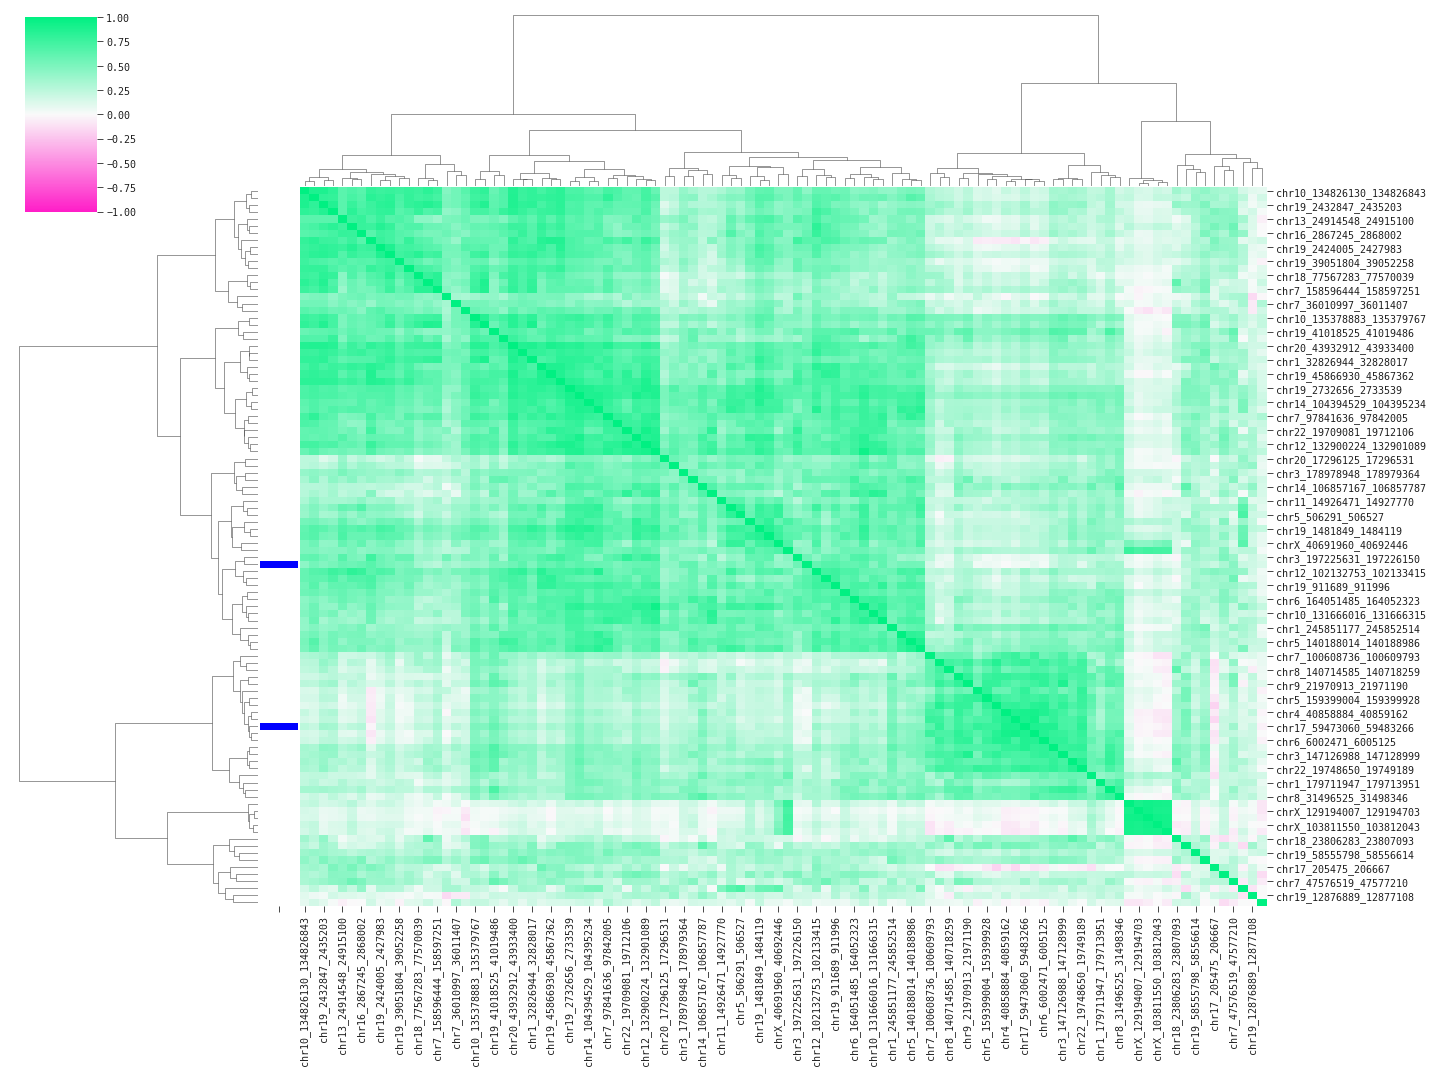

In [104]:
p = sns.clustermap(sample_data.corr(), method="ward", cmap='feyn-diverging', row_colors = row_coloring,
               vmin=-1, vmax=1, figsize=(20,15), robust=False)
p.savefig(filename+projectname+"clustermap.pdf")

In [53]:
p.savefig("HCC_seaborn_corrmap_031121.png")

In [54]:
pwd

'/home/niels/manuscript_abzu/manuscript_AD_HCC_notebooks/notebooks'

# Additional plots for article

In [55]:
sympy_model = best.sympify(symbolic_lr = True, signif=3)
sympy_model.as_expr()

1/(0.0436*exp(-0.969*chr191320737513207621 + 0.12*chr399878959989619) + 1)